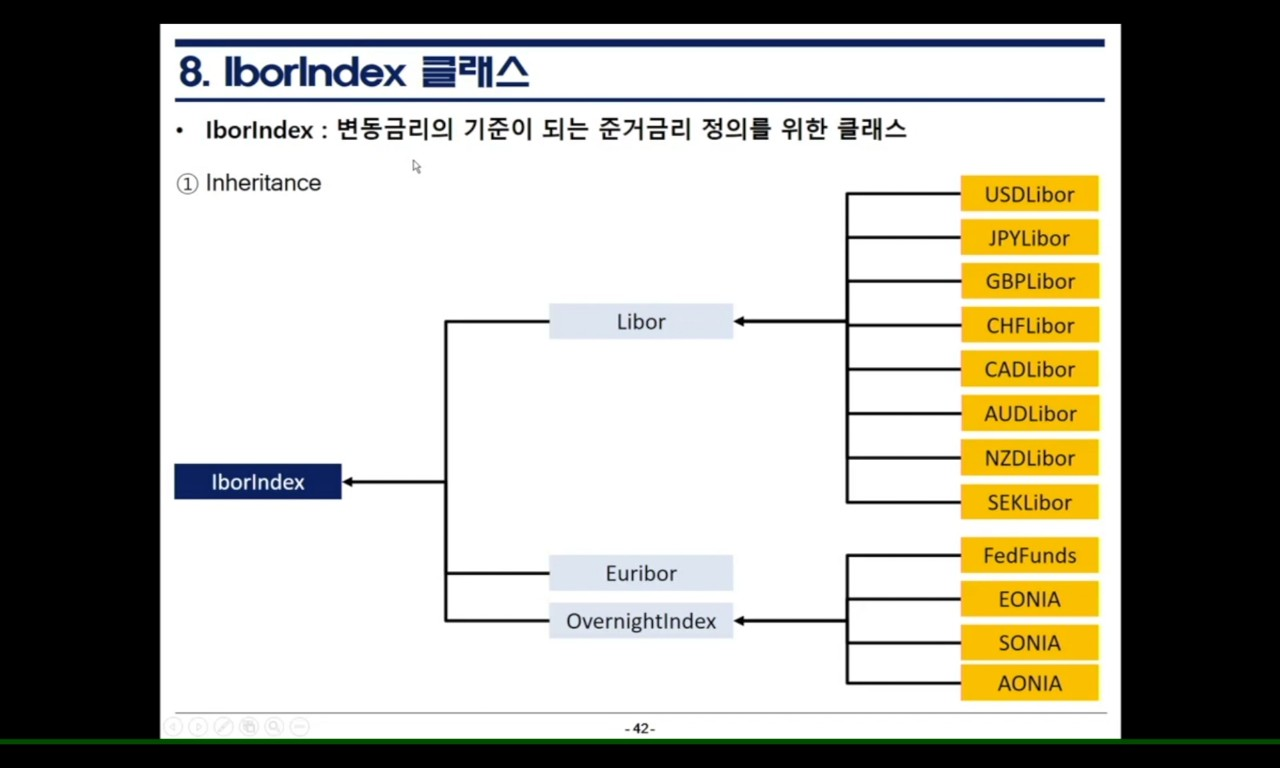

**IborIndex : 변동금리의 기준이 되는 준거금리 정의를 위한 클래스**

2023년쯤 되면 LIBOR 없어짐...LIBOR를 대체할 OvernightIndex (매일매일 산정되는 지수)

**스왑거래**를 할 때 준거 금리를 어떻게 설정할지가 중요함.

```python
ql.IborIndex(String name, # 이름
             Period tenor,   #지급주기. 한국은 3개월 단위
             Integer settlementDays,  #이자지급일과 이자결정일 간의 차이. 거래계약에 맞춰서 써주면 됨
             Currency currency,  #통화. 
             Calendar fixingCalendar, #계약이 되는 달력. 미국. 중국 등등
             BusinessDayConvention convention, #ModifiedFollowing 주로
             Bool endOfMonth,   # 월말기준이면 True
             DayCounter dayCounter,  
             (Handle) forecastYieldTermStructure)   #()는 생략해도 됨.

#Functions
# 스왑 계약 체결할 때 내일이 이자지급일이고 매일 변동금리가 나온다면...
# addFixing으로 호가되는 변동금리 추가해줘야함

ql.IborIndex().addFixing(Date FixingDate,  
                         Real FixingDate)
ql.IborIndex().clearFixings()  # 기 add되어 있는 data를 날려버림

#Currency()
ql.USDCurrency()
ql.EURCurrency()
ql.KRWCurrency()
ql.GBPCurrency()
ql.JPYCurrency()
ql.CNYCurrency()
             


```

In [2]:
import QuantLib as ql

In [7]:
name = 'USD_3m_LIBOR'
tenor = ql.Period(3, ql.Months)
settlementDays = 2  #보통 2일차이가 남.
currency = ql.USDCurrency()
us = ql.UnitedStates()
convention = ql.ModifiedFollowing
endOfMonth = False
dayCounter = ql.ActualActual()

usd_3m_libor = ql.IborIndex(name,
                            tenor,
                            settlementDays,
                           currency,
                            us,
                            convention,
                           endOfMonth,
                            dayCounter)

#오늘자 US 3개월 Libor가 0.015다... 라고 한다면.
# 이렇게 넣어줘야함
usd_3m_libor.addFixing(ql.Date(28,7,2020), 0.015)

In [8]:
usd_3m_libor.clearFixings()

In [11]:
print(usd_3m_libor)

USD_3m_LIBOR3M Actual/Actual (ISDA) index
